# **Link to youtube video for presentation:**

# **Imports for libraries** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import  f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# **Data Merge**

In [ ]:
data_labels=pd.read_csv('training_set_values.csv')
data_values=pd.read_csv('training_set_labels.csv')
data = data_values.merge(data_labels, on='id')

In [ ]:
data

# **EDA**

In [ ]:
data_labels=pd.read_csv('training_set_values.csv')
data_values=pd.read_csv('training_set_labels.csv')
data = data_values.merge(data_labels, on='id')

In [ ]:
data

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

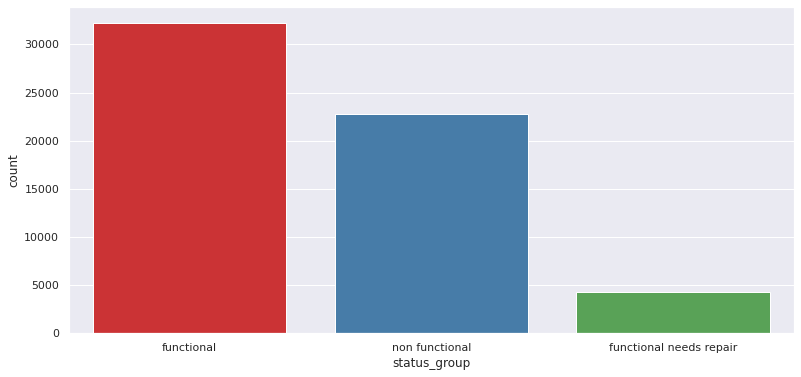

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(data.status_group, palette = 'Set1')
data.status_group.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

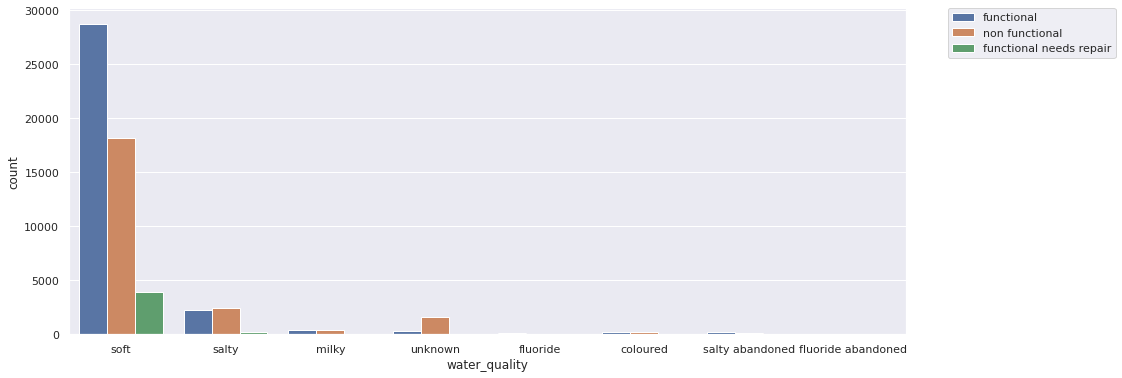

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=data,x='water_quality',hue='status_group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
data.water_quality.value_counts()

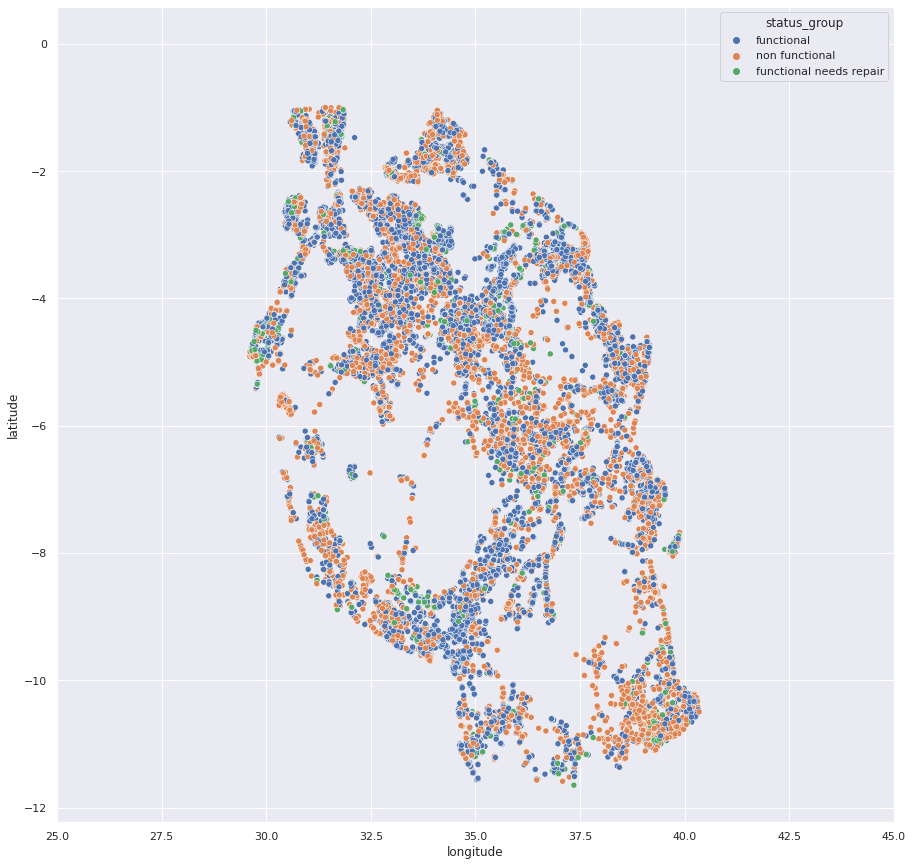

In [ ]:
plt.figure(figsize=(15,15))
g = sns.scatterplot(x=data['longitude'], y=data['latitude'], hue=data['status_group'])
g.set(xlim=(25, 45));

In [ ]:
data['construction_year'].unique()
data['status_group'].unique()
data['construction_year'] = data['construction_year'].astype(str)
year = data[['construction_year']].join(pd.get_dummies(data['status_group'])).groupby('construction_year')[data['status_group'].unique()].apply(sum)
year = year.iloc[1: , :]

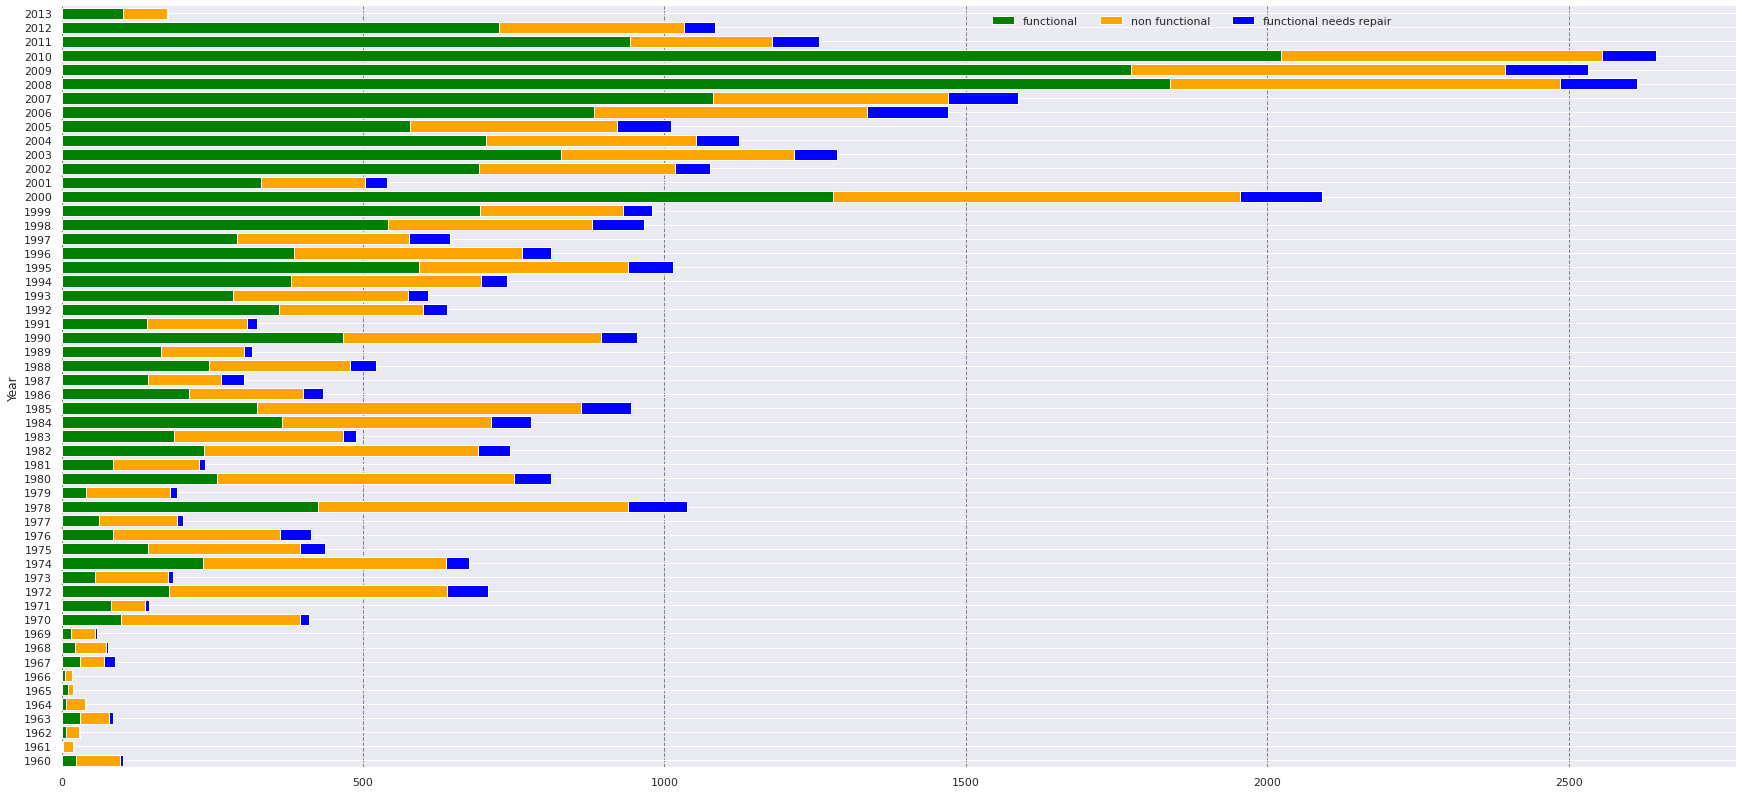

In [ ]:
fig, ax = plt.subplots(figsize=(30,14))
colors = ['green', 'orange', 'blue']
left = len(year) * [0]
for idx, name in enumerate(year):
    plt.barh(year.index, year[name], left = left, color=colors[idx])
    left = left + year[name]

plt.legend(year, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.ylabel('Year')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

In [ ]:
data['funder'].value_counts().head(15)

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Name: funder, dtype: int64

In [ ]:
funder_15 = data['funder'].value_counts().head(19).index.tolist()
data['funder_15'] = data['funder'].apply(lambda x: x if x in funder_15 else 'other')
funder = data[['funder_15']].join(pd.get_dummies(data['status_group'])).groupby('funder_15')[data['status_group'].unique()].apply(sum)

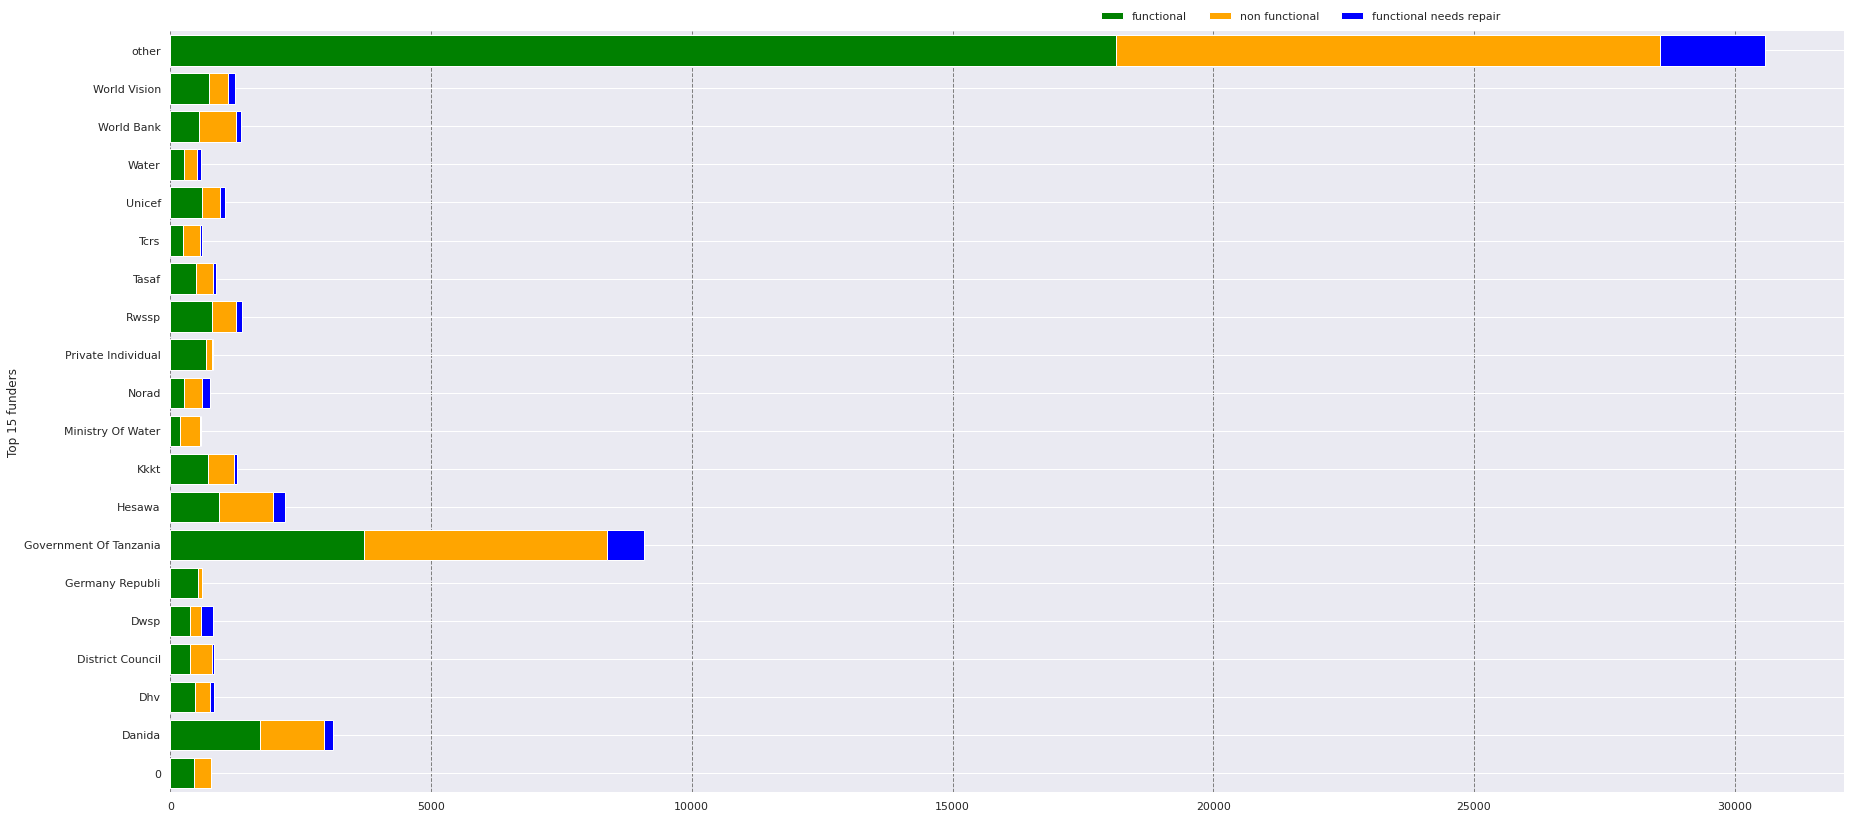

In [ ]:
fig, ax = plt.subplots(figsize=(30,14))
colors = ['green', 'orange', 'blue']
left = len(funder) * [0]
for idx, name in enumerate(funder):
    plt.barh(funder.index, funder[name], left = left, color=colors[idx])
    left = left + funder[name]

plt.legend(funder, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.ylabel('Top 15 funders')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

In [ ]:
installer_15 = data['installer'].value_counts().head(19).index.tolist()
data['installer_15'] = data['installer'].apply(lambda x: x if x in installer_15 else 'other')
installer = data[['installer_15']].join(pd.get_dummies(data['status_group'])).groupby('installer_15')[data['status_group'].unique()].apply(sum)

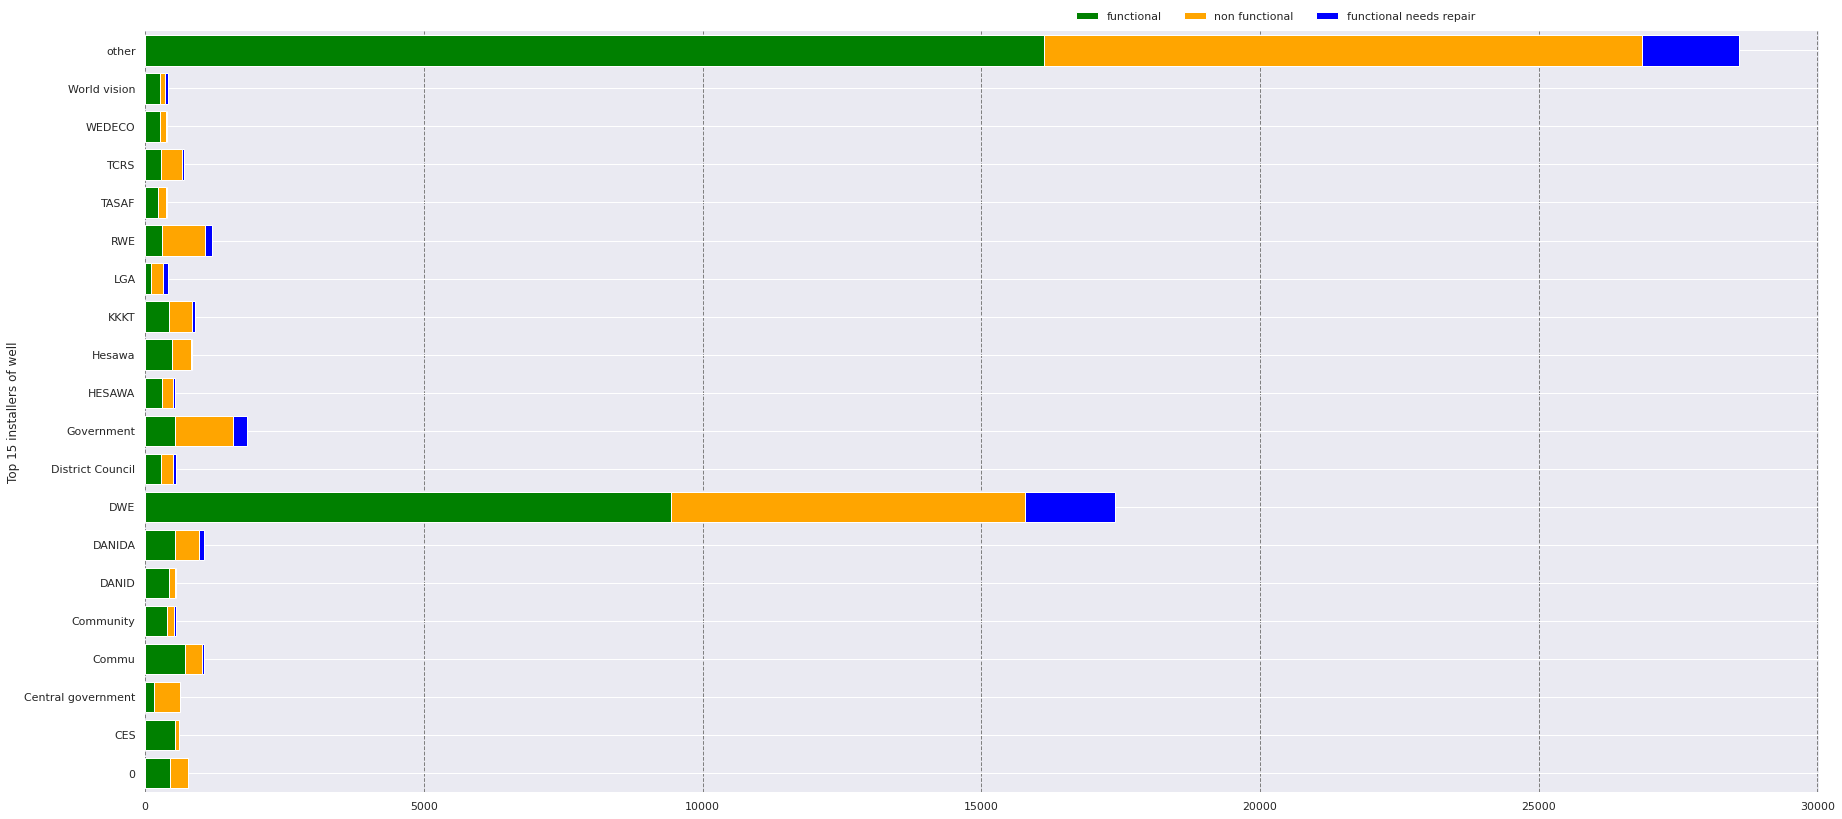

In [ ]:
fig, ax = plt.subplots(figsize=(30,14))
colors = ['green', 'orange', 'blue']
left = len(installer) * [0]
for idx, name in enumerate(installer):
    plt.barh(installer.index, installer[name], left = left, color=colors[idx])
    left = left + installer[name]

plt.legend(installer, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.ylabel('Top 15 installers of well')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

In [ ]:
data['payment'] = data['payment'].astype(str)
payment = data[['payment']].join(pd.get_dummies(data['status_group'])).groupby('payment')[data['status_group'].unique()].apply(sum)

In [ ]:
payment

,functional,non functional,functional needs repair
payment,,,
never pay,11379,12062,1907
other,611,325,118
pay annually,2740,655,247
pay monthly,5482,1891,927
pay per bucket,6090,2486,409
pay when scheme fails,2429,1208,277
unknown,3528,4197,432


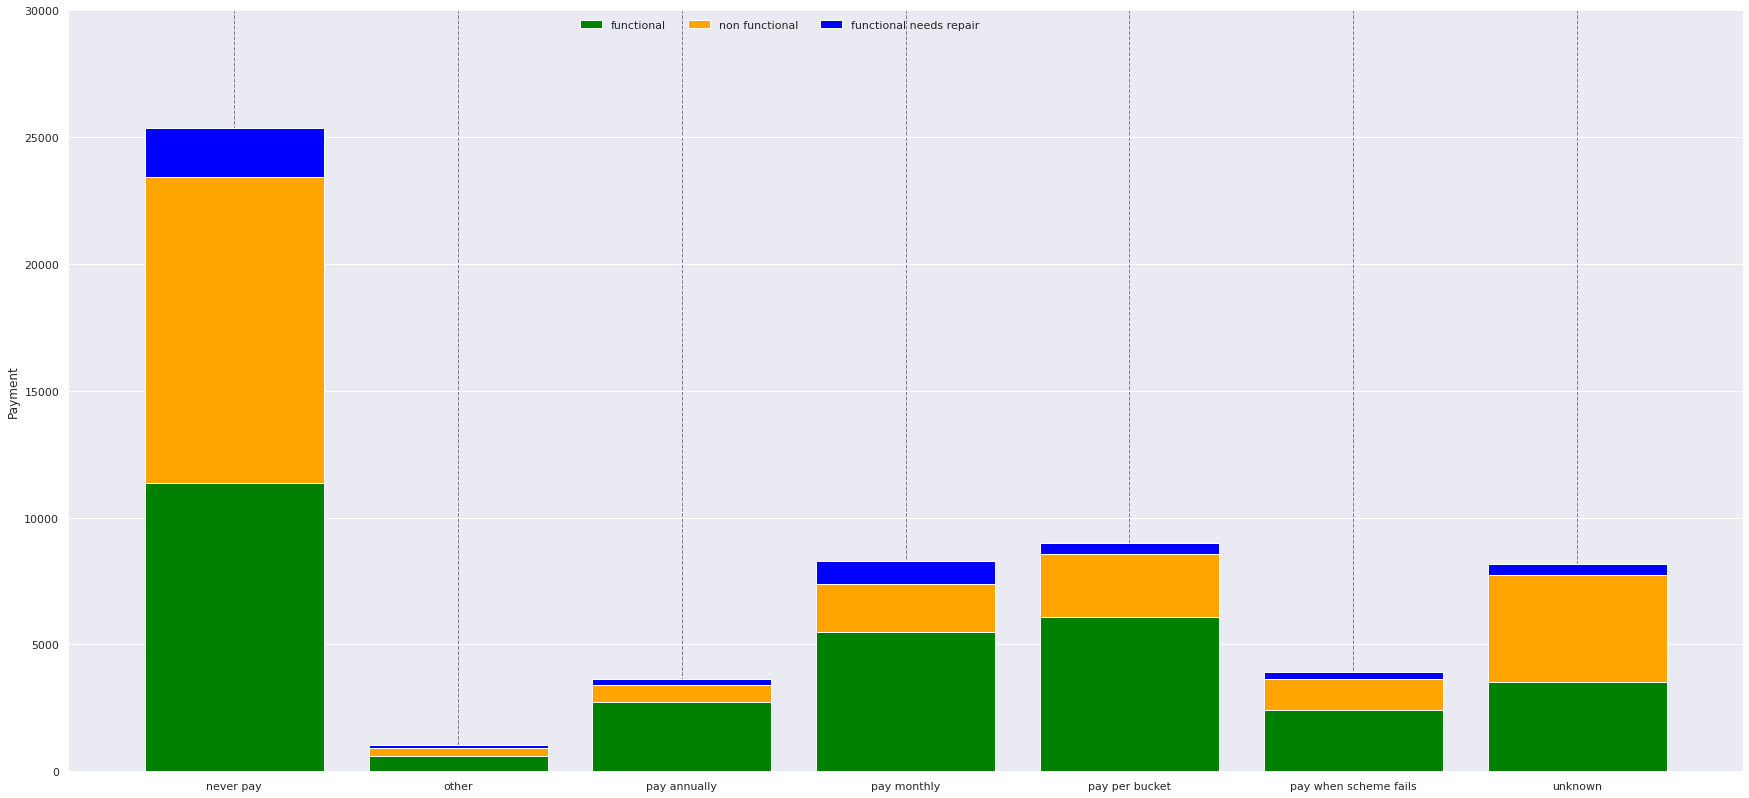

In [ ]:
fig, ax = plt.subplots(figsize=(30,14))
colors = ['green', 'orange', 'blue']
left = len(payment) * [0]
for idx, name in enumerate(payment):
    plt.bar(payment.index, payment[name], bottom = left, color=colors[idx])
    left = left + payment[name]

plt.legend(payment, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.ylabel('Payment')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

# **Data observing**

In [ ]:
df = pd.read_csv('training_set_values.csv', index_col='id')
Y = pd.read_csv('training_set_labels.csv', index_col='id')

In [ ]:
df_test = pd.read_csv('test_set.csv', index_col='id')
df_sub = pd.read_csv('SubmissionFormat.csv', index_col='id')

## **Columns with missing values**

In [ ]:
cols_with_none = df.isnull().sum()
cols_with_none = cols_with_none[cols_with_none>0]
cols_with_none

funder                3635
installer             3655
subvillage             371
public_meeting        3334
scheme_management     3877
scheme_name          28166
permit                3056
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


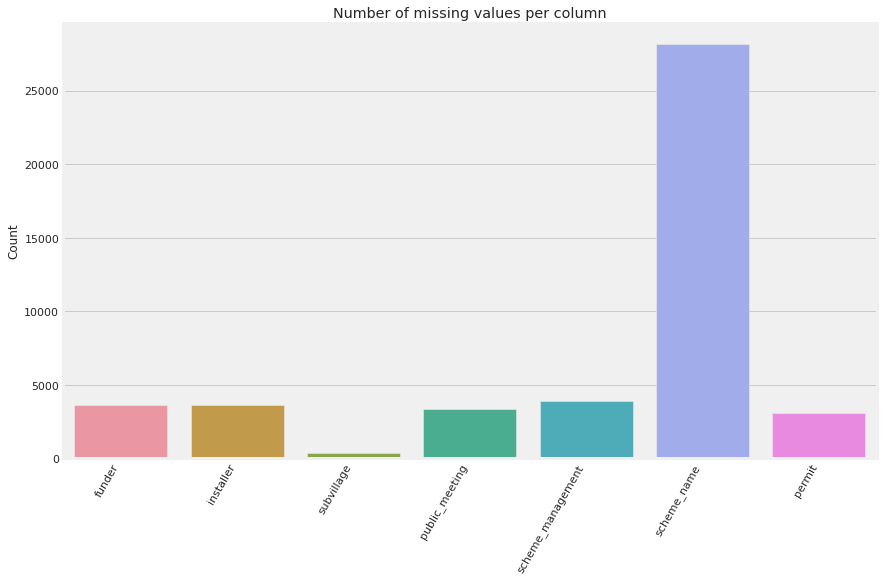

In [ ]:
plt.figure(figsize=(13,8));
p = sns.barplot(cols_with_none.index,cols_with_none.values);
# p.set_yscale("log")
p.set_xticklabels(p.get_xticklabels(), 
                  rotation=60, 
                  horizontalalignment='right');
plt.title('Number of missing values per column');
plt.ylabel('Count');

I used the logaritmic scale otherwise the columns with just one single NaN values would have disappeared leading to the misinterpretation of the graph.

# **Check the type of columns**

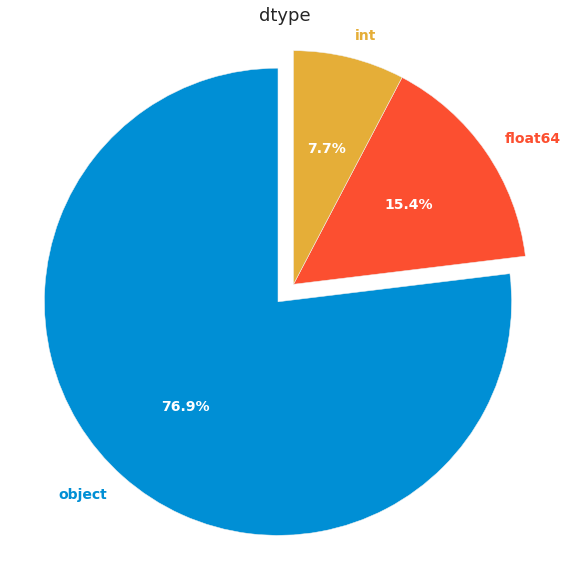

In [ ]:
labels = ('object','float64','int')
explode = (0.1, 0, 0)  # only "explode" the 1st )
fig1, ax1 = plt.subplots(figsize=(8,8))
patches, texts, pcts = ax1.pie(df.dtypes.value_counts(), explode=explode, labels = labels, autopct='%1.1f%%', startangle=90,textprops={'fontsize': 14})
# patches, texts, autotexts = ax.pie(frac, colors=colors, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.setp(pcts, color='white', fontweight='bold')

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax1.set_title('dtype', fontsize=18)
plt.tight_layout()

plt.show()

# **Labels in the target column**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


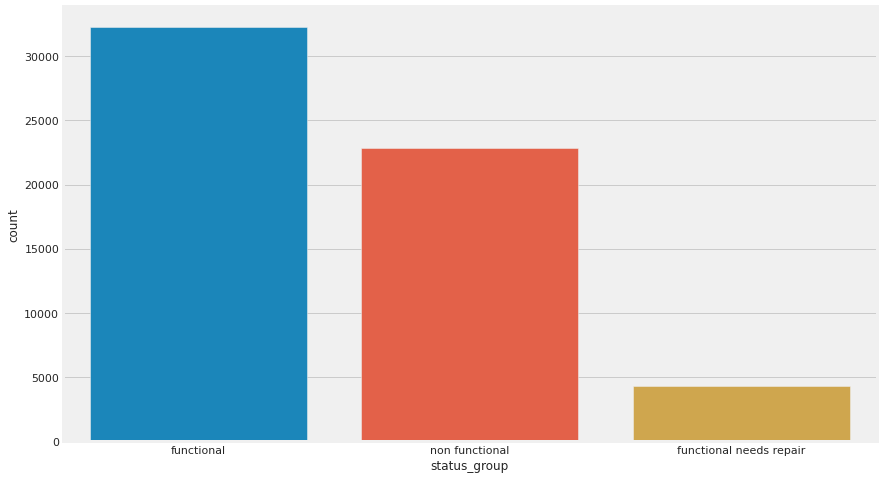

In [ ]:
plt.figure(figsize=(13,8));
sns.countplot(Y['status_group'])

# **Data cleaning**

# Drop scheme_name
As it has more than $10^4$ missing values I removed this feature

In [ ]:
df = df.drop(columns=['scheme_name'])

# Drop recorded_by
As it has only 1 unique values

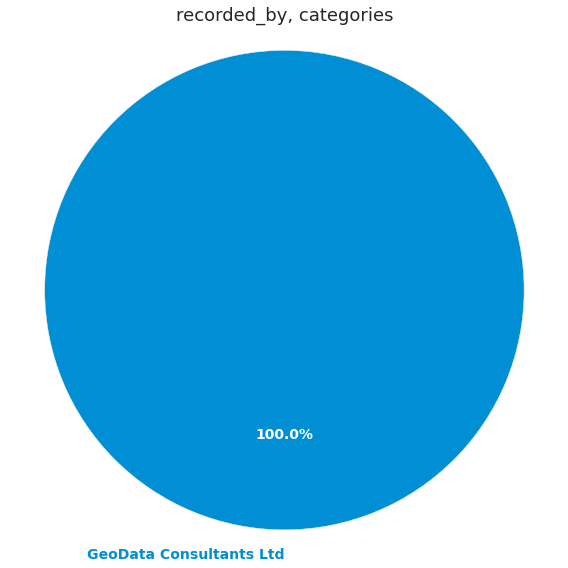

In [ ]:
labels = ['GeoData Consultants Ltd']
fig1, ax1 = plt.subplots(figsize=(8,8))
patches, texts, pcts = ax1.pie(df.recorded_by.value_counts(), labels = labels, autopct='%1.1f%%', startangle=90,textprops={'fontsize': 14})
# patches, texts, autotexts = ax.pie(frac, colors=colors, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.setp(pcts, color='white', fontweight='bold')

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax1.set_title('recorded_by, categories', fontsize=18)
plt.tight_layout()

plt.show()

In [ ]:
df = df.drop(columns='recorded_by')

# Drop date_recorded

In [ ]:
from datetime import datetime
df['date_recorded']= pd.to_datetime(df['date_recorded'])

year_recorded = df.date_recorded.dt.year


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


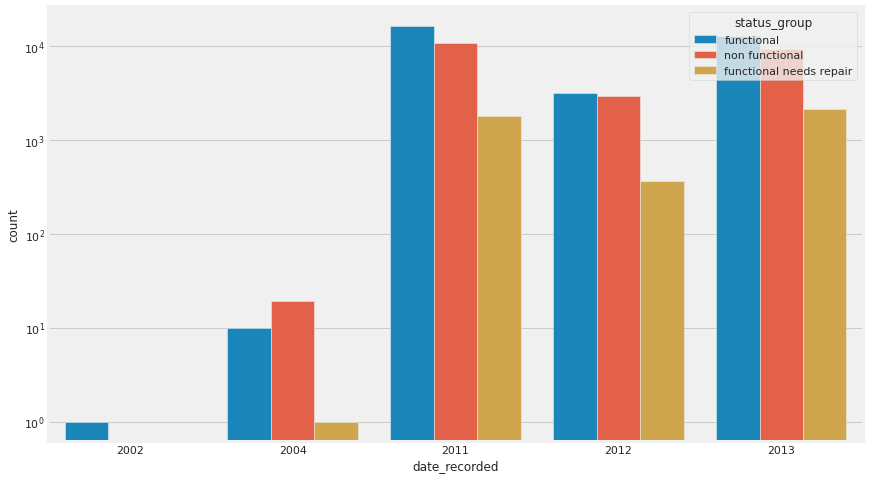

In [ ]:
plt.figure(figsize=(13,8));
p = sns.countplot(year_recorded,hue=Y.status_group)
p.set_yscale("log")

In [ ]:
df = df.drop(columns= 'date_recorded')

# **Number of unique values per feature**

In [ ]:
categarical_columns = df.select_dtypes(include = 'object').columns.to_list()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


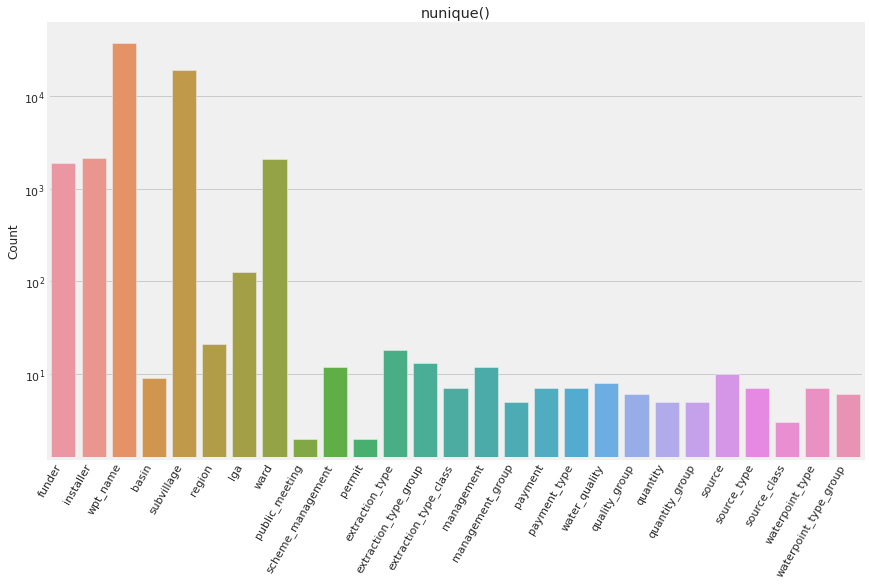

In [ ]:
plt.figure(figsize=(13,8));
p = sns.barplot(df[categarical_columns].nunique().index,df[categarical_columns].nunique().values);
p.set_yscale("log")
p.set_xticklabels(p.get_xticklabels(), 
                  rotation=60, 
                  horizontalalignment='right');
plt.title('nunique()');
plt.ylabel('Count');

# Drop subvillage, wpt_name
As they have more than $10^4$ unique values

In [ ]:
df = df.drop(columns=['subvillage','wpt_name'])

# Drop redundant columns

'quality_group','payment_type','source_type','waterpoint_type_group','quantity_group','extraction_type_group','region',scheme_management,

In [ ]:
df.groupby(['payment', 'payment_type']).size()

payment                payment_type
never pay              never pay       25348
other                  other            1054
pay annually           annually         3642
pay monthly            monthly          8300
pay per bucket         per bucket       8985
pay when scheme fails  on failure       3914
unknown                unknown          8157
dtype: int64

In [ ]:
df.groupby(['source', 'source_type']).size()

source                source_type         
dam                   dam                       656
hand dtw              borehole                  874
lake                  river/lake                765
machine dbh           borehole                11075
other                 other                     212
rainwater harvesting  rainwater harvesting     2295
river                 river/lake               9612
shallow well          shallow well            16824
spring                spring                  17021
unknown               other                      66
dtype: int64

In [ ]:
df.groupby(['waterpoint_type', 'waterpoint_type_group']).size()

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              116
communal standpipe           communal standpipe       28522
communal standpipe multiple  communal standpipe        6103
dam                          dam                          7
hand pump                    hand pump                17488
improved spring              improved spring            784
other                        other                     6380
dtype: int64

In [ ]:
df.groupby(['quantity', 'quantity_group']).size()

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64

In [ ]:
df.groupby(['water_quality', 'quality_group']).size()

water_quality       quality_group
coloured            colored            490
fluoride            fluoride           200
fluoride abandoned  fluoride            17
milky               milky              804
salty               salty             4856
salty abandoned     salty              339
soft                good             50818
unknown             unknown           1876
dtype: int64

In [ ]:
df.groupby(['extraction_type', 'extraction_type_group']).size()

extraction_type            extraction_type_group
afridev                    afridev                   1770
cemo                       other motorpump             90
climax                     other motorpump             32
gravity                    gravity                  26780
india mark ii              india mark ii             2400
india mark iii             india mark iii              98
ksb                        submersible               1415
mono                       mono                      2865
nira/tanira                nira/tanira               8154
other                      other                     6430
other - mkulima/shinyanga  other handpump               2
other - play pump          other handpump              85
other - rope pump          rope pump                  451
other - swn 81             other handpump             229
submersible                submersible               4764
swn 80                     swn 80                    3670
walimi                 

In [ ]:
df.groupby([ 'region_code','region']).size()

region_code  region       
1            Dodoma           2201
2            Arusha           3024
3            Kilimanjaro      4379
4            Tanga            2513
5            Morogoro         4006
             Tanga              34
6            Pwani            1609
7            Dar es Salaam     805
8            Lindi             300
9            Mtwara            390
10           Ruvuma           2640
11           Iringa           5294
             Shinyanga           6
12           Mbeya            4639
13           Singida          2093
14           Shinyanga          20
             Tabora           1959
15           Rukwa            1808
16           Kigoma           2816
17           Mwanza             55
             Shinyanga        4956
18           Kagera           3316
             Lindi               8
19           Mwanza           3047
20           Mara             1969
21           Manyara          1583
24           Arusha            326
40           Pwani          

In [ ]:
redundant_columns = ['quality_group','payment_type','source_type','waterpoint_type_group',
                     'quantity_group','extraction_type_group','region']

In [ ]:
df = df.drop(columns= redundant_columns)

# Fill NaN categorical feature with 'Unknown'

In [ ]:
categarical_columns = df.select_dtypes(include = 'object').columns.to_list()

In [ ]:
categarical_columns

['funder',
 'installer',
 'basin',
 'lga',
 'ward',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'source_class',
 'waterpoint_type']

In [ ]:
df[categarical_columns] = df[categarical_columns].fillna(value = 'unknown' )

In [ ]:
df.public_meeting.nunique()

3

# Funder

In [ ]:
df.funder.nunique()

1898

In [ ]:
df['FREQ'] = \
    df.groupby('funder', as_index=False)['funder'].transform(lambda s: s.count())

In [ ]:
df.loc[(df.FREQ < df.FREQ.quantile(.20)),'funder'] = 'Unknown'

In [ ]:
df.funder.value_counts()

Unknown                   11757
Government Of Tanzania     9084
unknown                    3635
Danida                     3114
Hesawa                     2202
                          ...  
Tanza                        88
Missi                        87
Mdrdp                        86
Undp                         86
H                            86
Name: funder, Length: 100, dtype: int64

In [ ]:
df['funder'] = pd.factorize(df['funder'])[0] 

In [ ]:
df.funder.nunique()

100

# installer

In [ ]:
df['installer'].value_counts().head(30)

DWE                   17402
unknown                3656
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
World vision            408
LGA                     408
WEDECO                  397
TASAF                   396
District council        392
Gover                   383
AMREF                   329
TWESA                   316
WU                      301
Dmdd                    287
ACRA                    278
World Vision            270
SEMA                    249
DW                      246
Name: installer, dtype: int64

In [ ]:
df['installer'] = df['installer'].astype(str).str.lower()

In [ ]:
df['FREQ'] = \
    df.groupby('installer', as_index=False)['installer'].transform(lambda s: s.count())
df.loc[(df.FREQ < df.FREQ.quantile(.20)),'installer'] = 'unknown'

In [ ]:
df['installer'].replace(
    to_replace=(
        'government', 'central government', 'gover'),
    value='government', inplace=True)

In [ ]:
df['installer'].replace(
    to_replace=(
        'commu'),value='community', inplace=True)

In [ ]:
df['installer'] = pd.factorize(df['installer'])[0] 

In [ ]:
df.installer.nunique()

79

#lga

In [ ]:
df['FREQ'] = \
    df.groupby('lga', as_index=False)['lga'].transform(lambda s: s.count())
df.loc[(df.FREQ < df.FREQ.quantile(.20)),'lga'] = 'Unknown'

In [ ]:
df['lga'] = pd.factorize(df['lga'])[0] 

In [ ]:
df.lga.nunique()

72

In [ ]:
df = df.drop(columns=['FREQ'])

# Factorize the target 

In [ ]:
Y.status_group = pd.factorize(Y.status_group)[0]

# Factorize the remaining categorical features

In [ ]:
categarical_columns = df.select_dtypes(include = 'object').columns.to_list()

In [ ]:
categarical_columns

['basin',
 'ward',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'source_class',
 'waterpoint_type']

In [ ]:
for i in categarical_columns:
  df[i] = pd.factorize(df[i])[0]

# Fill NaN values in numerical float features with mean value

In [ ]:
float_columns = df.select_dtypes(include = 'float64').columns.to_list()

In [ ]:
df[float_columns] = df[float_columns].fillna(value = df[float_columns].mean(axis=0) )

# Fill NaN values in numerical int features with median value

In [ ]:
int_columns = df.select_dtypes(include = 'int').columns.to_list()

In [ ]:
df[int_columns] = df[int_columns].fillna(value = df[int_columns].median(axis=0) )

# Fill outliers in Year columns
In year column outliers are identified as 0.
Let's find them and replace with the median value

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


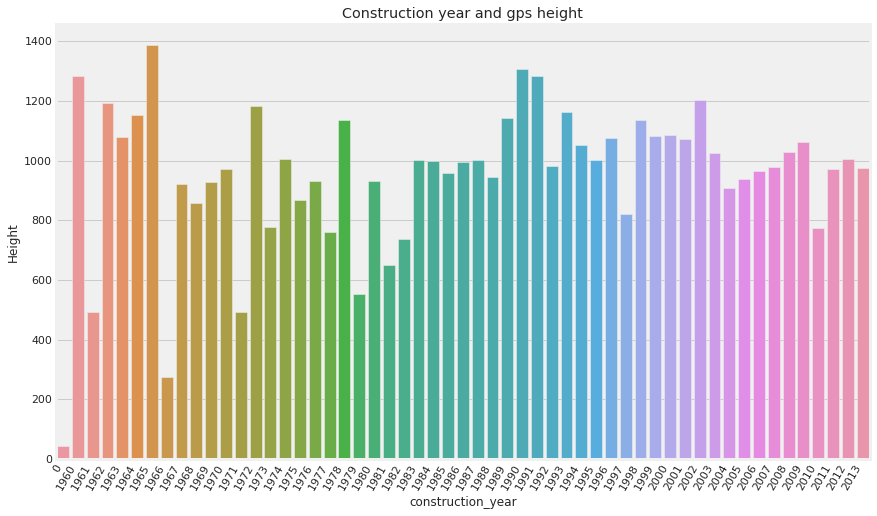

In [ ]:
mean_height_by_year = df['construction_year'].map(df.groupby('construction_year').gps_height.mean())
plt.figure(figsize=(13,8));
p = sns.barplot(df.construction_year,mean_height_by_year);
# p.set_yscale("log")
p.set_xticklabels(p.get_xticklabels(), 
                  rotation=60, 
                  horizontalalignment='right');
plt.title('Construction year and gps height');
plt.ylabel('Height');

In [ ]:
df['construction_year'] = df['construction_year'].replace(0,df['construction_year'].median())

# Remove features with high correlation

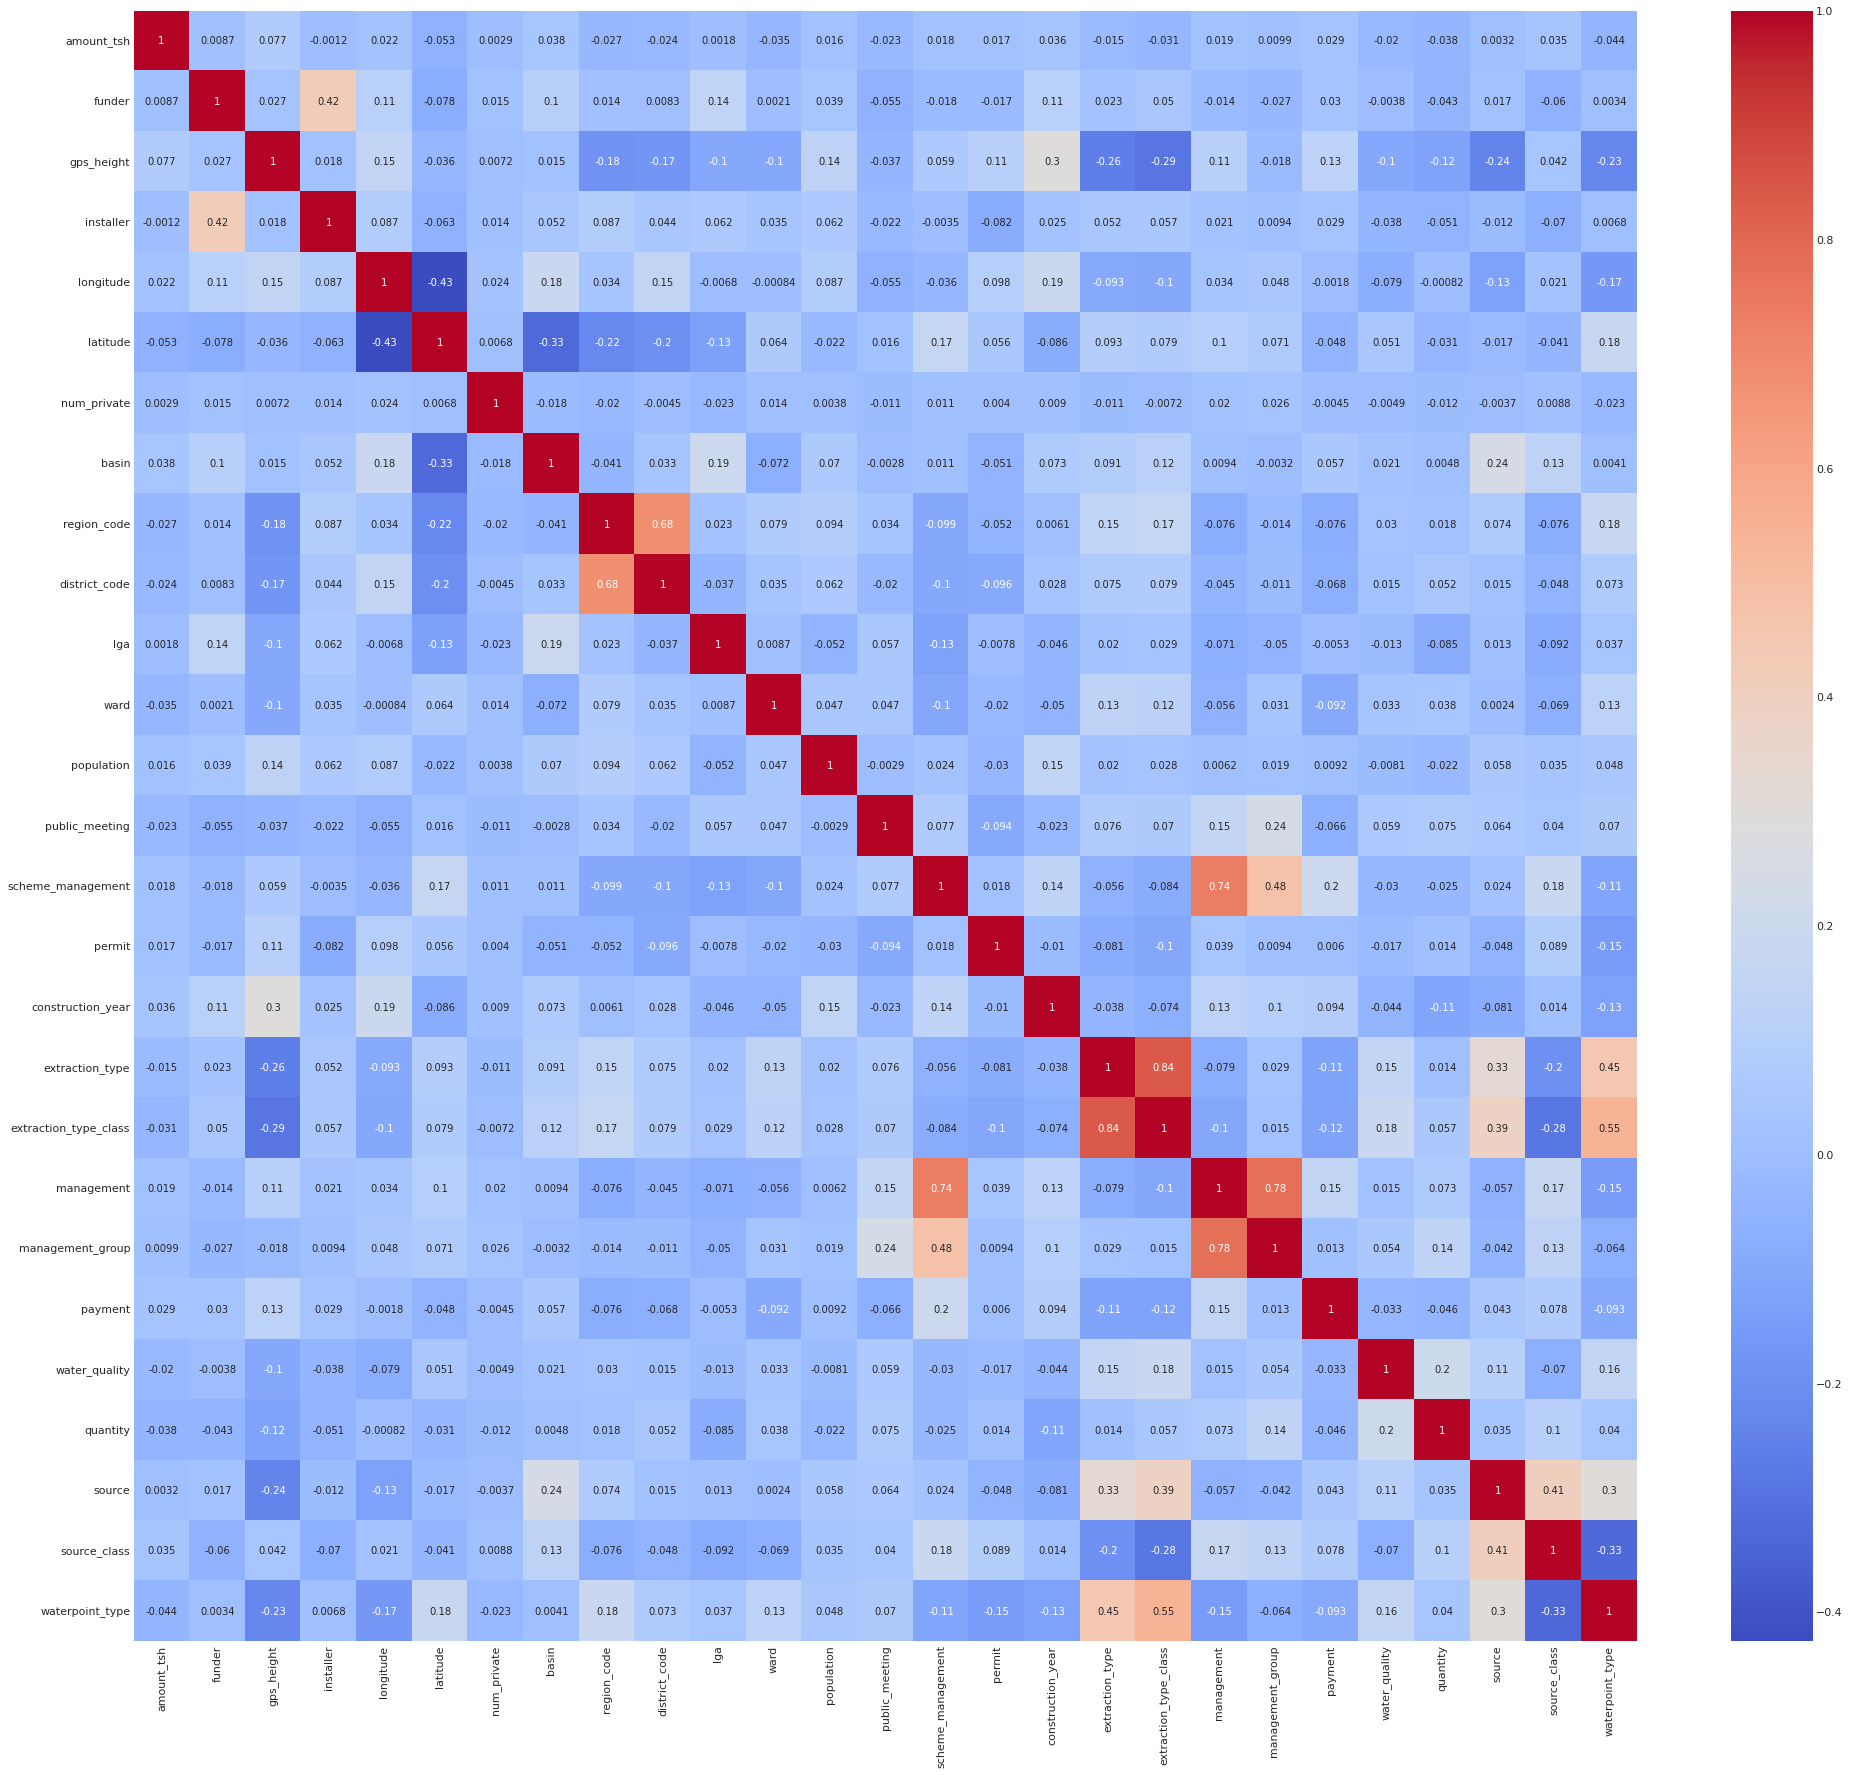

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(method='pearson'), annot = True, cmap = 'coolwarm');

In [ ]:
df.groupby(['extraction_type', 'extraction_type_class']).size()

extraction_type  extraction_type_class
0                0                        26780
1                1                         4764
2                2                         3670
3                2                         8154
4                2                         2400
5                3                         6430
6                1                         1415
7                4                         2865
8                5                          117
9                2                         1770
10               6                          451
11               2                           98
12               2                          229
13               2                           85
14               4                           90
15               4                           32
16               2                           48
17               2                            2
dtype: int64

In [ ]:
df.groupby(['management', 'management_group']).size()

management  management_group
0           0                   40507
1           0                    6515
2           1                     844
3           2                    1971
4           0                    2933
5           0                    2535
6           2                     685
7           2                     904
8           3                    1768
9           4                     561
10          1                      99
11          2                      78
dtype: int64

In [ ]:
df.groupby(['region_code','district_code']).size()

region_code  district_code
1            0                 23
             1                888
             3                361
             4                347
             5                358
                             ... 
80           53               291
             62               109
90           33               759
             63               158
99           1                423
Length: 130, dtype: int64

In [ ]:
df.groupby(['management', 'scheme_management']).size()

management  scheme_management
0           0                    35388
            1                       41
            2                     2450
            3                       83
            4                      401
                                 ...  
11          2                        1
            3                        1
            5                        2
            7                       10
            10                      61
Length: 95, dtype: int64

As they have similar information we leave only the feature with the smallest number of categories

In [ ]:
df = df.drop(columns=['region_code','management','extraction_type','scheme_management'])

# Create new feature

In [ ]:
df['distance'] = df['longitude']**2+df['latitude']**2

In [ ]:
df = df.drop(columns=['longitude','latitude'])

# Save the datasets

In [ ]:
df_old = df.copy()

In [ ]:
Y_old = Y.copy()

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
df.to_csv('df_pumpitup_before.csv')
!cp df_pumpitup_before.csv "drive/My Drive"

In [ ]:
Y.to_csv('Y_pumpitup_before.csv')
!cp Y_pumpitup_before.csv "drive/My Drive/"

# Oversampling by SMOTE

In [ ]:
import random
import numpy as np
from sklearn.neighbors import NearestNeighbors

class SMOTE(object):
    """
    Parameters:
    ----------
    k_neighbors: int, optional (default=5)
                 Number of nearest neighbors
    ----------
    """

    def __init__(self, k_neighbors=5):
        self.k = k_neighbors

    def fit(self, X_minority):
        """
        Fit SMOTE to the minority class:  
        It finds the k_neighbors of each sample from the minority class  

        Parameters:
        ----------
        X_minority: array, X_minority.shape() = (n_minority_samples, n_features)
                    Contains examples from the minority class
                    
        """
        self.X = X_minority
        self.n_minority_samples, self.n_features = self.X.shape

        # Learn nearest neighbors
        self.neigh = NearestNeighbors(n_neighbors=self.k + 1) # sklearn function to find the k-nearest neighbors
        self.neigh.fit(self.X)

        return self  

    def sample(self, N_samples):
        '''
        Generate N new synthetic samples from the minority class

        Parameters:
        ----------
        N_samples: int
                  Number of new synthetic samples

        Returns:
        -------
        X_new : array, shape = [N_samples, n_features]
            Returns synthetic samples.
        '''
        X_new = np.zeros(shape=(N_samples, self.n_features))
        # Calculate synthetic samples
        for i in range(N_samples):
            j = np.random.choice(range(self.X.shape[0]))

            # Takes the k nearest neighbors around X[j]
            new_neighs = self.neigh.kneighbors(self.X[j].reshape(1, -1), return_distance=False)[:, 1:]  # takes all columns except the first one [:,0] as it is X[j] itself
            
            # Chooses one of the k neighbors
            new_neigh_index = np.random.choice(new_neighs[0])  
            
            # Measures the index between X[j] and the randomly choosen neighbor
            distance = self.X[new_neigh_index] - self.X[j] 
            fraction = np.random.random()
            
            # Synthetizes a new sample by adding to X[j] a fraction of the distance
            X_new[i, :] = self.X[j, :] + fraction * distance[:] 

        return X_new

In [ ]:
 # Find the minority class
(unique, counts) = np.unique(Y.to_numpy(), return_counts=True)
minority_class = unique[counts==-np.max(-counts)][0]
x_minority = df[Y.status_group == minority_class].to_numpy()

smote = SMOTE(k_neighbors=7)
smote.fit(x_minority)

# modify the distribution by creating N synthetic examples from minority class
N = Y.status_group.value_counts()[1]-Y.status_group.value_counts()[2]
x_new = smote.sample(N_samples = N)
y_new = np.ones(N)*minority_class

In [ ]:
# Append the new examples
x_new = pd.DataFrame(x_new, columns=df.columns)
y_new = pd.DataFrame(y_new, columns=Y.columns)

df = df.append(x_new, ignore_index=True)
Y = Y.append(y_new, ignore_index=True)

# **Train test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=.3, random_state=42, shuffle=True, stratify=Y)

# **RFC, XGBoost & Catboost**

In [ ]:
Y = pd.DataFrame(y,columns=[ 
                      'status_group'])
# Y['status_group'] = pd.factorize(Y['status_group'])[0]

X_train, X_test, Y_train, Y_test= train_test_split(df, Y, test_size = 0.3, random_state = 42)

In [ ]:
num_columns = ['distance', 'construction_year',	 'population',	'gps_height', 'amount_tsh']

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train[num_columns])
X_train[num_columns] = scaler.transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
rfc = RandomForestClassifier( n_estimators = 400)

# max_depth = 90, n_estimators = 400
rfc.fit(X_train, Y_train)

Y_pred_rfc=rfc.predict(X_test)  
print('f1_score = ',f1_score(Y_test,Y_pred_rfc,average='macro'))
print('rfc = ',rfc.get_params())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


f1_score =  0.8526911653297679
rfc =  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100],
    # 'max_features': [2, 3],
    # 'min_samples_leaf': [3, 4, 5],
    # 'min_samples_split': [8, 10, 12],
    'n_estimators': [500, 600, 700, 800, 900, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
XGB = XGBClassifier(max_depth=26, n_estimators = 61)



XGB.fit(X_train, Y_train)


# Y_pred = grid_search.predict(X_test)
Y_pred_xgb = XGB.predict(X_test)


print('f1_score = ',f1_score(Y_test,Y_pred_xgb, average='macro'))
print('XGB = ',XGB.get_params())


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


f1_score =  0.8449355938456197
XGB =  {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 26, 'min_child_weight': 1, 'missing': None, 'n_estimators': 61, 'n_jobs': 1, 'nthread': None, 'objective': 'multi:softprob', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100],
    # 'max_features': [2, 3],
    # 'min_samples_leaf': [3, 4, 5],
    # 'min_samples_split': [8, 10, 12],
    'n_estimators': [800, 900, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

# fit model
rfc_onevsrest = OneVsRestClassifier(RandomForestClassifier())
xgb_onevsrest = OneVsRestClassifier(XGBClassifier())

rfc_onevsrest.fit(X_train, Y_train)
xgb_onevsrest.fit(X_train, Y_train)

rfc_pred = rfc_onevsrest.predict(X_test)
rfc_pred_prob = rfc_onevsrest.predict_proba(X_test)

xgb_pred = xgb_onevsrest.predict(X_test)
xgb_pred_prob = xgb_onevsrest.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3



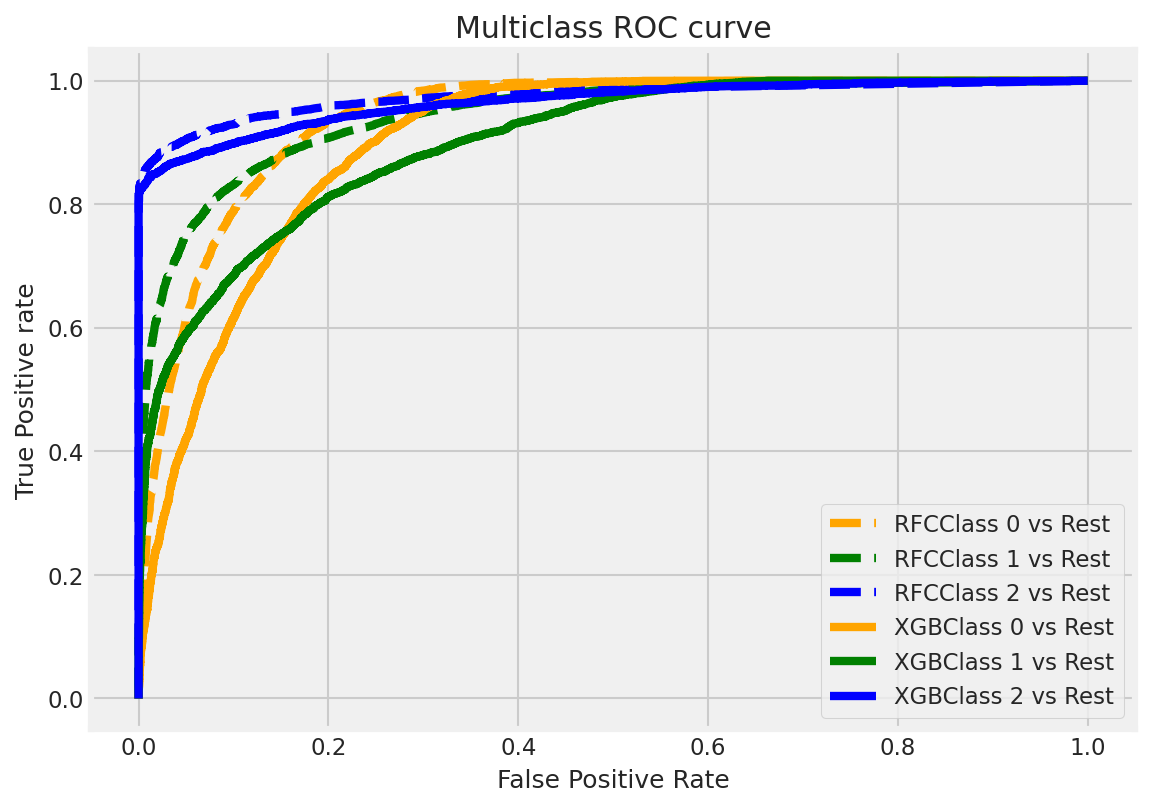

In [ ]:
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, rfc_pred_prob[:,i], pos_label=i)
    fpr[i+3], tpr[i+3], thresh[i+3] = roc_curve(Y_test, xgb_pred_prob[:,i], pos_label=i)


plt.figure(figsize=(8, 6), dpi=150)

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='RFCClass 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='RFCClass 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='RFCClass 2 vs Rest')

plt.plot(fpr[3], tpr[3], linestyle='-',color='orange', label='XGBClass 0 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='-',color='green', label='XGBClass 1 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='-',color='blue', label='XGBClass 2 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

In [ ]:
pip install scikit-plot

In [ ]:
Y_pred_xgb = pd.DataFrame(Y_pred_xgb)

In [ ]:
df.shape

(77907, 22)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    # 'max_features': [2, 3],
    # 'min_samples_leaf': [3, 4, 5],
    # 'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}
# Create a based model
# rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = XGBClassifier, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

# fit model
rfc_onevsrest = OneVsRestClassifier(RandomForestClassifier(n_estimators=600, max_depth =90 ))
xgb_onevsrest = OneVsRestClassifier(XGBClassifier(n_estimators=900, random_state=42))

rfc_onevsrest.fit(X_train, Y_train)
xgb_onevsrest.fit(X_train, Y_train)

rfc_pred = rfc_onevsrest.predict(X_test)
rfc_pred_prob = rfc_onevsrest.predict_proba(X_test)

xgb_pred = xgb_onevsrest.predict(X_test)
xgb_pred_prob = xgb_onevsrest.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3



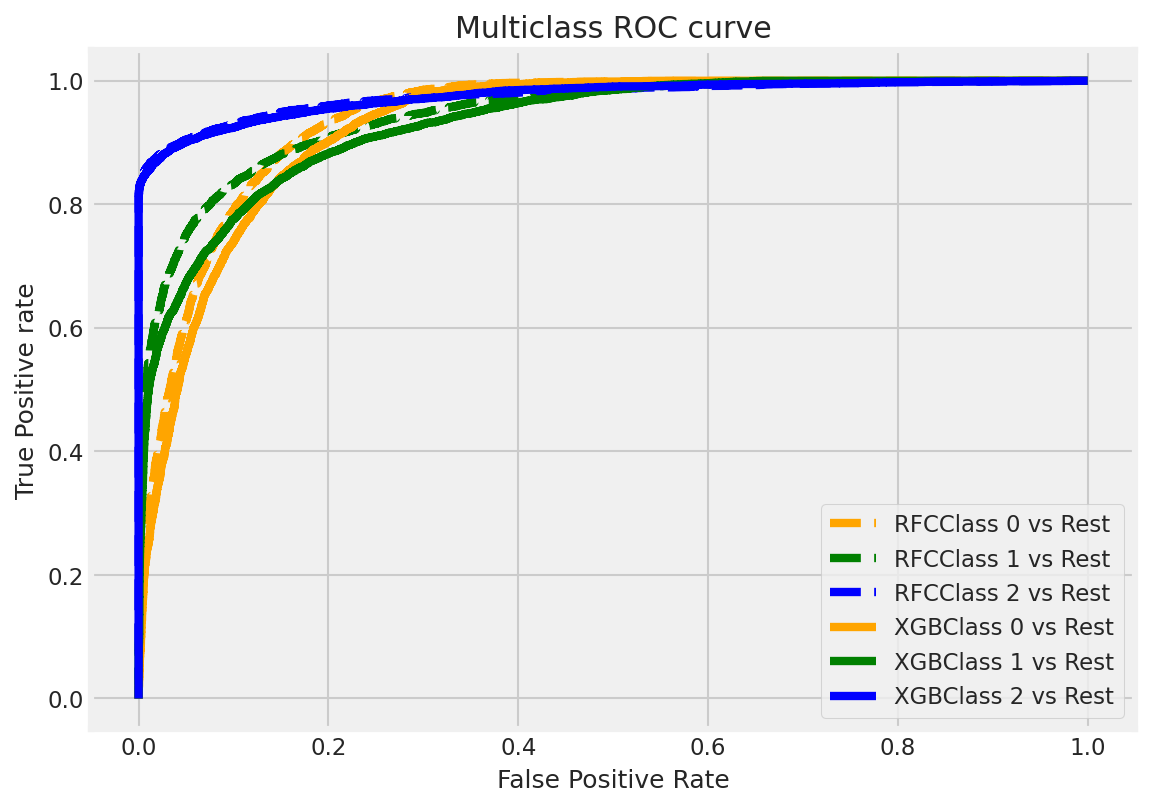

In [ ]:
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, rfc_pred_prob[:,i], pos_label=i)
    fpr[i+3], tpr[i+3], thresh[i+3] = roc_curve(Y_test, xgb_pred_prob[:,i], pos_label=i)


plt.figure(figsize=(8, 6), dpi=150)

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='RFCClass 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='RFCClass 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='RFCClass 2 vs Rest')

plt.plot(fpr[3], tpr[3], linestyle='-',color='orange', label='XGBClass 0 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='-',color='green', label='XGBClass 1 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='-',color='blue', label='XGBClass 2 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

In [ ]:
pip install catboost


     |████████████████████████████████| 76.4 MB 37 kB/s 


In [ ]:
from catboost import Pool, CatBoostClassifier




In [ ]:
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import f1_score

cbc = CatBoostClassifier(        
        eval_metric='AUC');


# Fit model
cbc.fit(X_train,Y_train);
# Get predicted classes
y_pred = cbc.predict(X_test);


Learning rate set to 0.095694
0:	total: 31.8ms	remaining: 31.8s
1:	total: 59.1ms	remaining: 29.5s
2:	total: 86.7ms	remaining: 28.8s
3:	total: 114ms	remaining: 28.3s
4:	total: 142ms	remaining: 28.3s
5:	total: 170ms	remaining: 28.2s
6:	total: 203ms	remaining: 28.7s
7:	total: 228ms	remaining: 28.3s
8:	total: 257ms	remaining: 28.3s
9:	total: 283ms	remaining: 28s
10:	total: 313ms	remaining: 28.2s
11:	total: 341ms	remaining: 28.1s
12:	total: 369ms	remaining: 28s
13:	total: 411ms	remaining: 28.9s
14:	total: 442ms	remaining: 29s
15:	total: 474ms	remaining: 29.2s
16:	total: 502ms	remaining: 29s
17:	total: 529ms	remaining: 28.9s
18:	total: 562ms	remaining: 29s
19:	total: 587ms	remaining: 28.8s
20:	total: 618ms	remaining: 28.8s
21:	total: 645ms	remaining: 28.7s
22:	total: 672ms	remaining: 28.6s
23:	total: 703ms	remaining: 28.6s
24:	total: 738ms	remaining: 28.8s
25:	total: 762ms	remaining: 28.5s
26:	total: 790ms	remaining: 28.5s
27:	total: 825ms	remaining: 28.6s
28:	total: 859ms	remaining: 28.7s
2

In [ ]:
print(['f1-macro = ', f1_score(y_pred,Y_test,average = 'macro')])

['f1-macro = ', 0.6587028860950496]


In [ ]:
from catboost import Pool, CatBoostClassifier

cbc = CatBoostClassifier(eval_metric='AUC');

grid = {
    # 'max_depth': [3,4,5],
        'n_estimators':[800, 900, 1000],
        # 'learning_rate': [0.03, 0.1],
        # 'l2_leaf_reg': [1, 3, 5, 7, 9]
        }

#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='f1_macro', cv = 5)

# Fit model
gscv.fit(X_train,Y_train)
# Get predicted classes
Y_pred = gscv.predict(X_test);
print(['f1-macro = ', f1_score(Y_pred,Y_test,average = 'macro')])

Выходные данные были обрезаны до нескольких последних строк (5000).
5:	total: 241ms	remaining: 39.9s
6:	total: 282ms	remaining: 40s
7:	total: 319ms	remaining: 39.6s
8:	total: 356ms	remaining: 39.2s
9:	total: 394ms	remaining: 39s
10:	total: 444ms	remaining: 39.9s
11:	total: 483ms	remaining: 39.8s
12:	total: 522ms	remaining: 39.6s
13:	total: 565ms	remaining: 39.8s
14:	total: 603ms	remaining: 39.6s
15:	total: 652ms	remaining: 40.1s
16:	total: 691ms	remaining: 40s
17:	total: 731ms	remaining: 39.9s
18:	total: 768ms	remaining: 39.7s
19:	total: 804ms	remaining: 39.4s
20:	total: 845ms	remaining: 39.4s
21:	total: 890ms	remaining: 39.6s
22:	total: 929ms	remaining: 39.5s
23:	total: 973ms	remaining: 39.6s
24:	total: 1.01s	remaining: 39.4s
25:	total: 1.05s	remaining: 39.3s
26:	total: 1.09s	remaining: 39.2s
27:	total: 1.13s	remaining: 39.2s
28:	total: 1.18s	remaining: 39.4s
29:	total: 1.21s	remaining: 39.2s
30:	total: 1.26s	remaining: 39.3s
31:	total: 1.29s	remaining: 39.2s
32:	total: 1.34s	remainin

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    # 'max_depth': [80, 90, 100, 110],
    'max_features': ['auto'],
    # 'min_samples_leaf': [3, 4, 5],
    # 'min_samples_split': [8, 10, 12],
    # 'n_estimators': [100,200,400,600,800]
}


# Create a based model
XGB_CV = XGBClassifier()


# Instantiate the grid search model

    # rfc_grid_search = GridSearchCV(estimator = rfc_CV,
    #                               #  param_distributions =  param_grid, 
    #                               n_estimators = i,
    #                               #  param_grid = param_grid, 
    #                           cv = 5, n_jobs = -1,
    #                           #  verbose = 2
    #                           )


# rfc=RandomForestClassifier(n_estimators=45, random_state=42)
# rfc.fit(X_train, Y_train.astype(int))
# Y_pred=rfc.predict(X_test)
# print('f1_score = ',f1_score(Y_test,Y_pred))


for i in range(100,3000,100):

    rfc=XGBClassifier(n_estimators=i, random_state=42)

    rfc.fit(X_train, Y_train)

    Y_pred=rfc.predict(X_test)
    print(i)
    print('f1_score = ',f1_score(Y_test,Y_pred,average='macro'))
    # print()
    # print('rfc = ',rfc.best_params_) 


# max depth = 90, n est = 40

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


100
f1_score =  0.7967807218410665
200
f1_score =  0.8081011701588601
300
f1_score =  0.8137933759344523
400
f1_score =  0.8174543356623284
500
f1_score =  0.8206437649342861
600
f1_score =  0.8237300778681983
700
f1_score =  0.8259838675288532
800
f1_score =  0.8276946963991092
900
f1_score =  0.8301634190079313
1000
f1_score =  0.8301959725792871
1100
f1_score =  0.8310991936780464
1200
f1_score =  0.8335221298244019
1300
f1_score =  0.8347196566813953
1400
f1_score =  0.8349550118025993


KeyboardInterrupt: ignored

In [ ]:
param_grid = {
    # 'max_depth': [80, 90, 100, 110],
    'max_features': ['auto'],
    # 'min_samples_leaf': [3, 4, 5],
    # 'min_samples_split': [8, 10, 12],
    # 'n_estimators': [100,200,400,600,800]
}






for i in range(100,3000,100):

    rfc=XGBClassifier(n_estimators=i, random_state=42)

    rfc.fit(X_train, Y_train)

    Y_pred=rfc.predict(X_test)
    print(i)
    print('f1_score = ',f1_score(Y_test,Y_pred,average='macro'))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1500
f1_score =  0.7699852262122965


In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto'],
    # 'min_samples_leaf': [3, 4, 5],
    # 'min_samples_split': [8, 10, 12],
    'n_estimators': [100,200,400,600,800]
}


# Create a based model
rfc_CV = RandomForestClassifier()


# Instantiate the grid search model

    # rfc_grid_search = GridSearchCV(estimator = rfc_CV,
    #                               #  param_distributions =  param_grid, 
    #                               n_estimators = i,
    #                               #  param_grid = param_grid, 
    #                           cv = 5, n_jobs = -1,
    #                           #  verbose = 2
    #                           )


# rfc=RandomForestClassifier(n_estimators=45, random_state=42)
# rfc.fit(X_train, Y_train.astype(int))
# Y_pred=rfc.predict(X_test)
# print('f1_score = ',f1_score(Y_test,Y_pred))


for i in range(1000,3000,500):

    rfc=RandomForestClassifier(n_estimators=i, random_state=42)

    rfc.fit(X_train, Y_train)

    Y_pred=rfc.predict(X_test)
    print(i)
    print('f1_score = ',f1_score(Y_test,Y_pred,average='macro'))
    # print()
    # print('rfc = ',rfc.best_params_) 


# max depth = 90, n est = 40

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1000
f1_score =  0.8529143293131337


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1500
f1_score =  0.8530699440800605


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


2000
f1_score =  0.8529336855728499


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


2500
f1_score =  0.853129597342548


# Ensemble KNN Classifier - Before

In [ ]:
X = df_old
Y = Y_old

In [ ]:
Y

,status_group
id,
69572,0
8776,0
34310,0
67743,1
19728,0
...,...
60739,0
27263,0
37057,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=0, shuffle=True, stratify=Y)

num_columns = ['distance', 'construction_year',  'population', 'gps_height', 'amount_tsh']

scaler = StandardScaler() 
scaler.fit(X_train[num_columns]) 

 
X_train[num_columns] = scaler.transform(X_train[num_columns]) 
X_test[num_columns] = scaler.transform(X_test[num_columns])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import f1_score

print(['f1-macro = ', f1_score(y_pred, y_test,average = 'macro')])

best_param = knn.base_estimator_
print("Best parameter: ", best_param)

['f1-macro = ', 0.6182691773248422]
Best parameter:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-

Maximum accuracy:- 0.7343995510662177 at K = 2


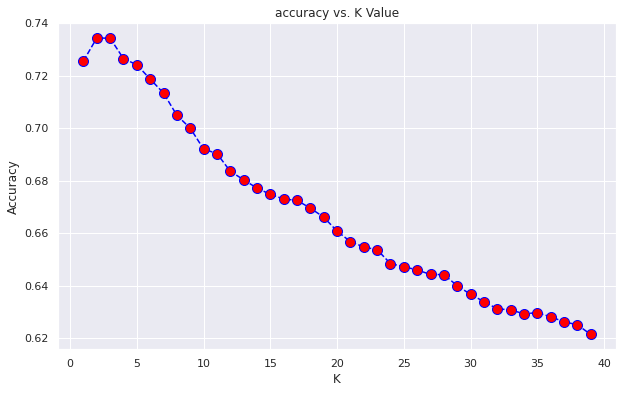

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    knn_c = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = knn_c.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)

In [ ]:
# Best KNN model
knn_cls = KNeighborsClassifier(n_neighbors = acc.index(max(acc))+1).fit(X_train,y_train)
y_pred = knn_cls.predict(X_test)
print(['f1-macro = ', f1_score(y_pred, y_test, average = 'macro')])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


['f1-macro = ', 0.6089358531331155]


In [ ]:
bag_cls = BaggingClassifier(base_estimator=knn_cls, n_estimators=25, random_state=0, bootstrap=True, oob_score=True)
bag_cls.fit(X_train, y_train)
y_pred = bag_cls.predict(X_test)
print(['f1-macro = ', f1_score(y_pred, y_test, average = 'macro')])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['f1-macro = ', 0.6318958156277696]


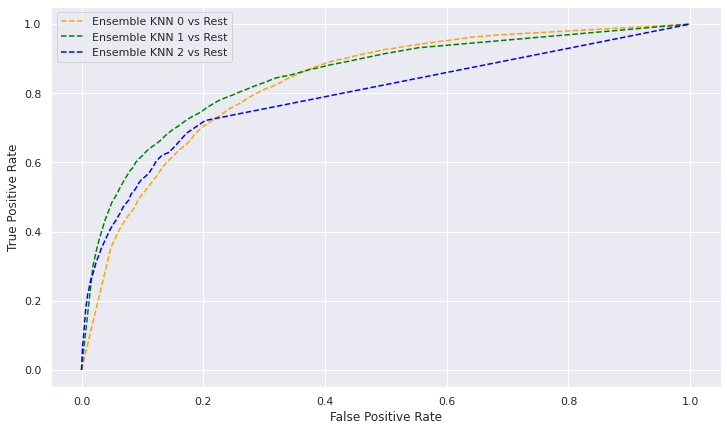

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

bag_probs = bag_cls.predict_proba(X_test)

ns_probs = [0 for _ in range(len(y_test))] 

fpr = {} 
tpr = {} 
thresh ={} 

n_class = 3 
 
for i in range(n_class):   
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, bag_probs[:,i], pos_label=i) 

plt.figure(figsize=(12, 7)) 

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Ensemble KNN 0 vs Rest') 
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Ensemble KNN 1 vs Rest') 
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Ensemble KNN 2 vs Rest') 
 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')  
plt.legend() 
plt.show()

# Ensemble KNN Classifier - After



In [ ]:
X = df
Y = Y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=0, shuffle=True, stratify=Y)

num_columns = ['distance', 'construction_year',  'population', 'gps_height', 'amount_tsh']

scaler = StandardScaler() 
scaler.fit(X_train[num_columns]) 

 
X_train[num_columns] = scaler.transform(X_train[num_columns]) 
X_test[num_columns] = scaler.transform(X_test[num_columns])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import f1_score

print(['f1-macro = ', f1_score(y_pred, y_test,average = 'macro')])

best_param = knn.base_estimator_
print("Best parameter: ", best_param)

['f1-macro = ', 0.775714150161452]
Best parameter:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-

Maximum accuracy:- 0.7627176656826252 at K = 1


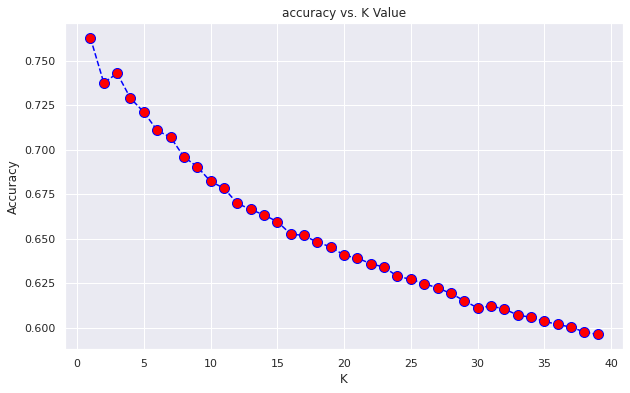

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    knn_c = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = knn_c.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)

In [ ]:
# Best KNN model
knn_cls = KNeighborsClassifier(n_neighbors = acc.index(max(acc))+1).fit(X_train,y_train)
y_pred = knn_cls.predict(X_test)
print(['f1-macro = ', f1_score(y_pred, y_test, average = 'macro')])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


['f1-macro = ', 0.7636997747632034]


In [ ]:
bag_cls = BaggingClassifier(base_estimator=knn_cls, n_estimators=25, random_state=0, bootstrap=True, oob_score=True)
bag_cls.fit(X_train, y_train)
y_pred = bag_cls.predict(X_test)
print(['f1-macro = ', f1_score(y_pred, y_test, average = 'macro')])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['f1-macro = ', 0.7630929622898127]


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(base_estimator__n_neighbors=[1], 
                  base_estimator__weights=['uniform', 'distance'], 
                  base_estimator__p=[1, 2],
                  base_estimator__leaf_size=[15, 30, 40], 
                  bootstrap_features=[True], 
                  max_features=[0.5], 
                  max_samples=[0.5], 
                  n_estimators=(1, 250, 100))

knn_new = BaggingClassifier(KNeighborsClassifier())

knn_cv = GridSearchCV(knn_new, param_grid, n_jobs=-1, cv=5, scoring='f1_macro')

knn_cv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                                             leaf_size=30,
                                                                             metric='minkowski',
                                                                             metric_params=None,
                                                                             n_jobs=None,
                                                                             n_neighbors=5,
                                                                             p=2,
                                                                             weights='uniform'),
                                         bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                       

In [ ]:
y_pred = knn_cv.predict(X_test)
print(['f1-macro = ', f1_score(y_pred, y_test, average = 'macro')])

['f1-macro = ', 0.823607818496266]


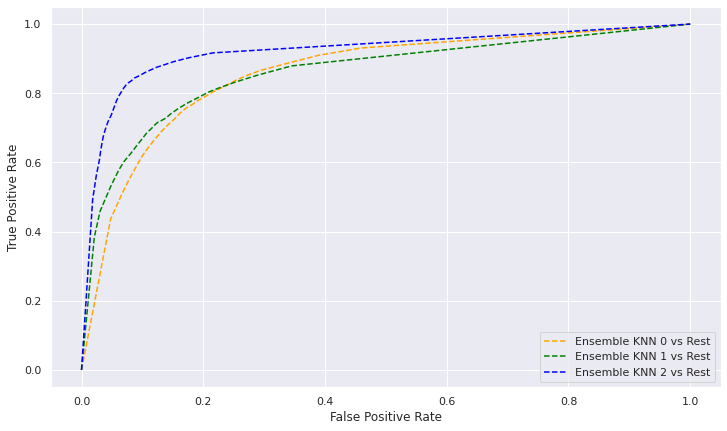

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

bag_probs_new = bag_cls.predict_proba(X_test)

ns_probs = [0 for _ in range(len(y_test))] 

fpr_new = {} 
tpr_new = {} 
thresh_new ={} 

n_class = 3 
 
for i in range(n_class):   
  fpr_new[i], tpr_new[i], thresh_new[i] = roc_curve(y_test, bag_probs_new[:,i], pos_label=i) 

plt.figure(figsize=(12, 7)) 

plt.plot(fpr_new[0], tpr_new[0], linestyle='--',color='orange', label='Ensemble KNN 0 vs Rest') 
plt.plot(fpr_new[1], tpr_new[1], linestyle='--',color='green', label='Ensemble KNN 1 vs Rest') 
plt.plot(fpr_new[2], tpr_new[2], linestyle='--',color='blue', label='Ensemble KNN 2 vs Rest') 
 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')  
plt.legend() 
plt.show()